In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [223]:
from skimage import io
from skimage import feature
from scipy.ndimage import gaussian_filter
from skimage import data
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage.exposure import equalize_hist
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity
from skimage.exposure import equalize_adapthist
from skimage.morphology import remove_small_objects  
from skimage.exposure import rescale_intensity

In [4]:
frames = ed.input_file('../musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')

In [121]:
len(frames)

743

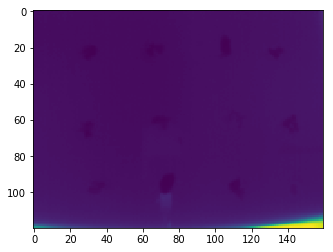

In [5]:
plt.imshow(frames[0])

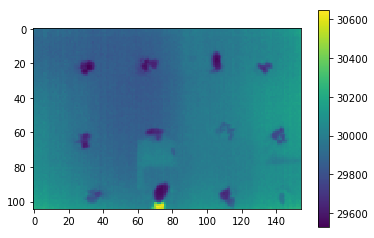

In [163]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[0:105,0:155])
plt.imshow(crop_frame[0])
plt.colorbar()

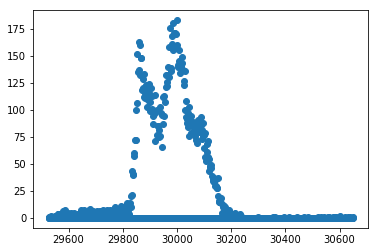

In [164]:
from skimage.exposure import histogram

hist, hist_centers = histogram(crop_frame[0])
plt.scatter(hist_centers, hist, linewidth=1)

In [165]:
crop_frame[0]

array([[29937, 29941, 29933, ..., 30127, 30146, 30180],
       [29916, 29920, 29929, ..., 30146, 30148, 30158],
       [29964, 29920, 29912, ..., 30148, 30154, 30176],
       ...,
       [30211, 30205, 30178, ..., 30207, 30207, 30190],
       [30227, 30227, 30211, ..., 30215, 30205, 30215],
       [30233, 30233, 30196, ..., 30233, 30233, 30231]], dtype=uint16)

In [166]:
crop_frame[0]/1400

array([[21.38357143, 21.38642857, 21.38071429, ..., 21.51928571,
        21.53285714, 21.55714286],
       [21.36857143, 21.37142857, 21.37785714, ..., 21.53285714,
        21.53428571, 21.54142857],
       [21.40285714, 21.37142857, 21.36571429, ..., 21.53428571,
        21.53857143, 21.55428571],
       ...,
       [21.57928571, 21.575     , 21.55571429, ..., 21.57642857,
        21.57642857, 21.56428571],
       [21.59071429, 21.59071429, 21.57928571, ..., 21.58214286,
        21.575     , 21.58214286],
       [21.595     , 21.595     , 21.56857143, ..., 21.595     ,
        21.595     , 21.59357143]])

In [240]:
import skimage
from skimage.filters import prewitt

In [245]:
edges = feature.canny(crop_frame[0]/1400)
filled_samples = binary_fill_holes(edges)
cl_samples = remove_small_objects(filled_samples,min_size = 15)
labeled_samples = label(cl_samples)

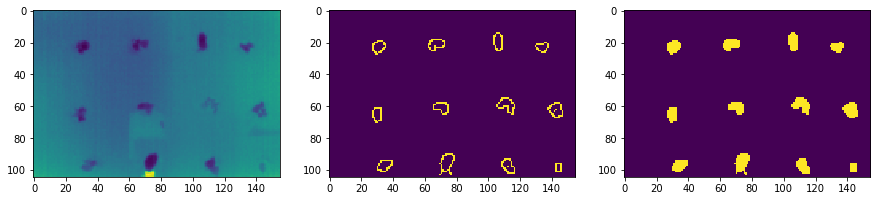

In [246]:
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(crop_frame[0])
# ax[0,0].colorbar()
ax[1].imshow(edges)
ax[2].imshow(cl_samples)
# ax[1,1].imshow(labeled_samples)

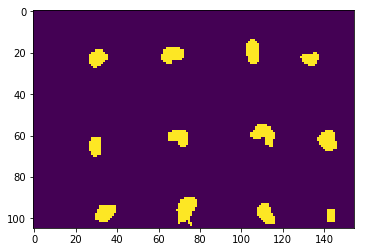

In [247]:
plt.imshow(cl_samples)

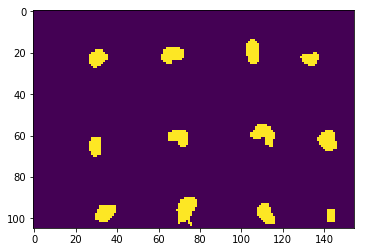

In [248]:
plt.imshow(cl_samples)

In [249]:
regprops = ed.regprop(labeled_samples,crop_frame,12)

In [100]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
7,65.0,29.0,29885.0,39.0,52.0,25.656854,29680.0
2,22.0,30.0,29870.0,40.0,60.0,26.142136,29579.0
10,97.0,34.0,29993.0,44.0,62.0,27.899495,29849.0
1,21.0,66.0,29898.0,76.0,66.0,29.899495,29658.0
5,60.0,70.0,29929.0,80.0,60.0,29.071068,29650.0
8,95.0,73.0,29986.0,83.0,91.0,40.349242,29557.0
0,19.0,105.0,30007.0,115.0,60.0,27.899495,29551.0
4,59.0,111.0,30042.0,121.0,78.0,37.556349,29958.0
9,97.0,111.0,30060.0,121.0,64.0,28.727922,29663.0
3,22.0,133.0,30077.0,143.0,43.0,23.313708,29724.0


In [101]:
s_temp, plate_temp = ed.sample_temp(regprops,crop_frame)

In [102]:
len(plate_temp)

12

Text(0, 0.5, 'Temperature of the PPA sample($^\\circ$C)')

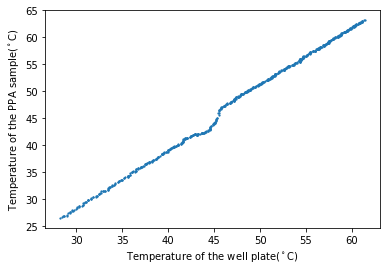

In [103]:
plt.scatter(plate_temp[11],s_temp[11],s=1.5)
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.ylabel('Temperature of the PPA sample($^\circ$C)')

In [ ]:
x = np.linspace(1,len(s_temp[0]),len(s_temp[0]))

In [ ]:
plt.scatter(x,s_temp[3],s=0.5)
plt.show()
plt.scatter(x,plate_temp[3],s=1.5)

In [ ]:
i_temp

In [ ]:
from scipy.interpolate import BSpline
from scipy.signal import find_peaks

In [ ]:
def inflection_point(s_temp,p_temp):
    s_infl = []
    p_infl = []
    s_peaks = []
    p_peaks = []
    inf_peak = [] ; inf_temp = []
    for temp in s_temp:
        frames = np.linspace(1,len(temp),len(temp))
        # Fitting a spline to the temperature profile of the samples.
        bspl = BSpline(frames,temp,k=3)
        # Stacking x and y to calculate gradient.
        gradient_array = np.column_stack((frames,bspl(frames)))
        # Calculating gradient.
        gradient = np.gradient(gradient_array,axis=0)
        # Calculating derivative
        derivative = gradient[:,1]/gradient[:,0]
        # Finding peaks in the derivative plot.
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        # Appending the index of the two highest peaks to lists.
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        # Appending the frame number in which these peaks occur to a list
        s_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        # Appending the temperature at the peaks.
        s_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for temp in p_temp:
        frames = np.linspace(1,len(temp),len(temp))
        bspl = BSpline(frames,temp,k=3)
        gradient_array = np.column_stack((frames,bspl(frames)))
        gradient = np.gradient(gradient_array,axis=0)
        derivative = gradient[:,1]/gradient[:,0]
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        p_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        p_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for i,peaks in enumerate(s_peaks):
        for peak in peaks:
            if abs(peak - p_peaks[i][0]) >= 3:
                inf_peak.append(peak)
                break
            else:
                pass
    for i,temp in enumerate(s_temp):
        inf_temp.append(temp[inf_peak[i]])
    return inf_temp, s_peaks, p_peaks

In [ ]:
i_temp,s_peaks,p_peaks = inflection_point(s_temp,plate_temp)

In [ ]:
i_temp